In [11]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, C=2.5)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle
file_name = "Log_model.sav"
cls = pickle.load(open(file_name, "rb"))
file_name = "tfidf.sav"
tfidf = pickle.load(open(file_name, "rb"))

c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [12]:
Sample_correct = ["this is good ."]
Sample_misclassify = ["something is not wrong ."]
Sample_incorrect = ["this is not good ."]
Sample = Sample_incorrect
test = tfidf.transform(Sample)
test_y = cls.predict(test)
coeffcients = cls.coef_[0]
index_list = []
feature_name = tfidf.get_feature_names()
for s in Sample:
    for w in s.split(" "):
        index_list += [i for i, j in enumerate(feature_name) if j == w]
coef_for_sample = []
for s in Sample_incorrect:
    for i, w in enumerate(s.split(" ")):
        coef_for_sample.append((w, coeffcients[index_list[i]]))
        #print("%s: %f" % (w, coeffcients[index_list[i]]))
test_y_prob = cls.predict_proba(test)
print("Prediction: %d with confidence %f" % (temp.predict(test), temp.predict_proba(test)[0][temp.predict(test)]))

Prediction: 0 with confidence 0.649144


In [13]:
def ngrams(input, n):
  input = input.split(' ')
  output = []
  for i in range(len(input)-n+1):
    output.append(input[i:i+n])
  return output

['this is', 'is not', 'not good', 'good .', 'this', 'is', 'not', 'good', '.']


<IPython.core.display.Javascript object>


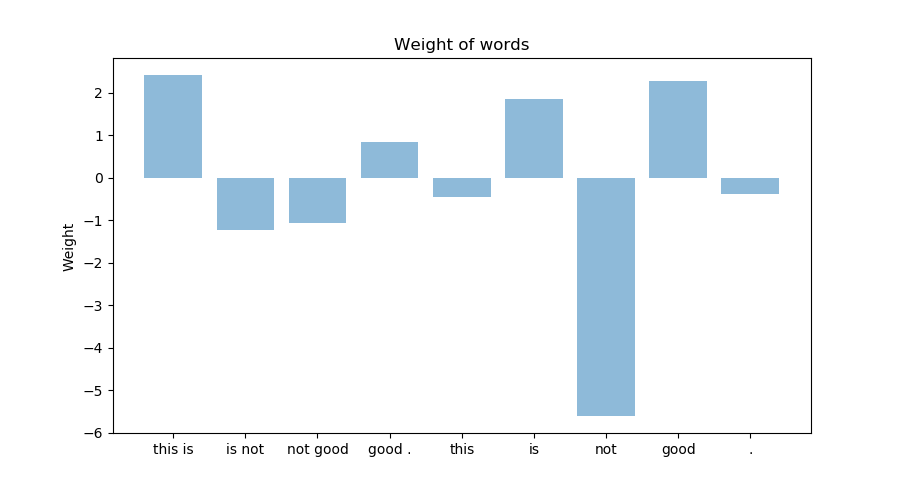

In [14]:
feature_to_weight = dict()
example_sentence_word = Sample[0].split(" ")
example_sentence = [' '.join(x) for x in ngrams(Sample[0], 2)]
example_sentence += example_sentence_word
weights = []
print(example_sentence)
for i, j in enumerate(feature_name):
    feature_to_weight[j] = i
for i, w in enumerate(example_sentence):
    index = feature_to_weight.get(w, -1)
    if index == -1:
        weights.append(0.0)
    else:
        weights.append(coeffcients[index])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = example_sentence
y_pos = np.arange(len(objects))
performance = weights

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()

In [15]:
%matplotlib notebook
from ipywidgets import *
import numpy as np

temp = pickle.load(open("Log_model.sav", "rb"))

test_ = tfidf.transform(Sample_correct)

def update(this_is = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["this is"]]),\
           is_good = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["is good"]]),\
           good_dot = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["good ."]]),\
           this = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["this"]]),\
           is_ = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["is"]]),\
           good = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["good"]]),\
           dot = widgets.FloatSlider(min= -10.0,max=10.0,step=0.01,value=coeffcients[feature_to_weight["."]])):
    temp.coef_[0][feature_to_weight["this is"]]= this_is
    temp.coef_[0][feature_to_weight["is good"]]= is_good
    temp.coef_[0][feature_to_weight["good ."]]= good_dot
    temp.coef_[0][feature_to_weight["this"]]= this
    temp.coef_[0][feature_to_weight["is"]]= is_
    temp.coef_[0][feature_to_weight["good"]]= good
    temp.coef_[0][feature_to_weight["."]]= dot
    return ("Prediction: %d with confidence %f" % (temp.predict(test_), temp.predict_proba(test_)[0][temp.predict(test_)]))


interact(update);

c:\users\raymondzhou\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


interactive(children=(FloatSlider(value=2.4105362983014738, description='this_is', max=10.0, min=-10.0, step=0…